## Interleaving

In [154]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Directory where the CSV files are stored
directory_path = 'data'

# Delete old merged_result.csv file
if os.path.exists(directory_path + '/merged_result.csv'):
    os.remove(directory_path + '/merged_result.csv')
    print("Cleared merged_result.csv file")

# Merge all CSV files in the directory
def merge_all_csv_files(directory):
    all_files = [file for file in os.listdir(directory) if file.endswith('.csv')]
    merged_df = pd.concat([pd.read_csv(os.path.join(directory, file), sep=';') for file in all_files])
    return merged_df

merged_df = merge_all_csv_files(directory_path)

# Save the merged dataframe to a new CSV file
merged_df.to_csv(os.path.join(directory_path, 'merged_result.csv'), index=False, sep=';')
print("The files were successfully merged: 'merged_result.csv'.")


Cleared merged_result.csv file
The files were successfully merged: 'merged_result.csv'.


## Rate of interleaving with no spacing

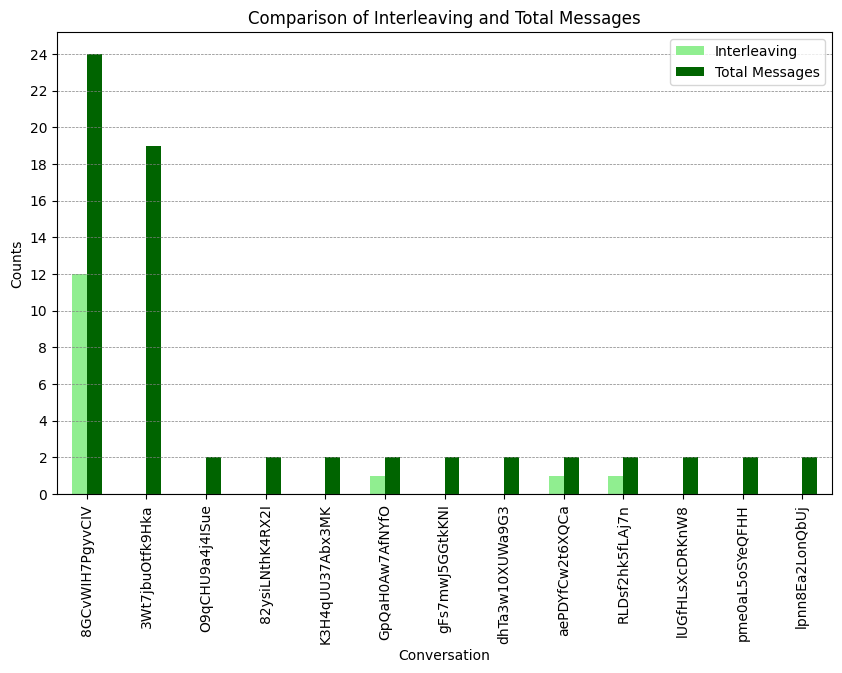

The number of unique conversations is: 26
The total number of messages is: 78
The total number of interleave messages is: 15
The percentage of interleave messages is: 19.23%


In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

# Load the merged CSV file into a DataFrame
df = pd.read_csv('data/merged_result.csv', sep=';')

# Convert 'Datetime' column to datetime using the correct format
df['Datetime'] = pd.to_datetime(df['Datetime'], format='%H:%M:%S - %d/%m/%Y', errors='coerce')

# Filter the DataFrame to only include rows where 'Role' column is 'User'
df = df[df['Role'] == 'User']

# Calculate time differences between each message for each user
df['TimeDelta'] = df.groupby('Id')['Datetime'].diff().fillna(pd.Timedelta(seconds=0))
df['TimeDeltaMinutes'] = df['TimeDelta'].dt.total_seconds() / 60  # Convert to minutes

# Remove rows where the 'Change' column is missing
df = df.dropna(subset=['Change'])

# Remove unnecessary columns from the DataFrame: Message, AI - 1%, AI - 2%, AI - 3%, AI - 4%, AI - 11%
df = df.drop(columns=['Message', 'AI - 1%', 'AI - 2%', 'AI - 3%', 'AI - 4%', 'AI - 11%'])

# Remove conversations where there is at least one record with TimeDeltaMinutes > 60
ids_to_remove = df[df['TimeDeltaMinutes'] > 60]['Id'].unique()
df = df[~df['Id'].isin(ids_to_remove)]

# save the DataFrame to a new CSV file
#df.to_csv('data/interleaving_nospacing.csv', index=False, sep=';')

# Count the number of 'Yes' in the 'Change' column for each unique 'Id'
yes_counts = df[df['Change'] == 'Yes'].groupby('Id').size()

# Count the total number of messages for each unique 'Id'
total_messages_counts = df.groupby('Id').size()

# Combine the counts into a single DataFrame
comparison_df = pd.DataFrame({
    'Yes Counts': yes_counts,
    'Total Messages': total_messages_counts
}).fillna(0)

# Sort the DataFrame by 'Total Messages' in descending order
comparison_df = comparison_df.sort_values(by='Total Messages', ascending=False)

# Remove rows where 'Total Messages' is 1
comparison_df = comparison_df[comparison_df['Total Messages'] > 1]

if yes_counts.empty:
    print("No Interleaving in conversations with no spacing")
else:
    # Plot the results with combined bars in shades of green
    ax = comparison_df.plot(kind='bar', figsize=(10, 6), color=['lightgreen', 'darkgreen'])
    plt.xlabel('Conversation')
    plt.ylabel('Counts')
    plt.title('Comparison of Interleaving and Total Messages')
    plt.legend(['Interleaving', 'Total Messages'])
    ax.yaxis.set_major_locator(plt.MultipleLocator(2))  # Ensure Y-axis has even integer ticks starting from 0
    ax.set_ylim(bottom=0)  # Ensure Y-axis starts from 0
    ax.axhline(y=0, color='gray', linewidth=0.8)  # Add a horizontal gray line at y=0

    # Add dashed gray lines at each y-tick
    for tick in ax.get_yticks():
        ax.axhline(y=tick, color='gray', linestyle='--', linewidth=0.5)

    plt.show()

# Count the number of unique users
unique_users = df['Id'].nunique()
print(f'The number of unique conversations is: {unique_users}')

# Count number of messages
total_messages = df.shape[0]
print(f'The total number of messages is: {total_messages}')

# Count the total of interleave messages
total_interleave = df[df['Change'] == 'Yes'].shape[0]
print(f'The total number of interleave messages is: {total_interleave}')

# % of interleave messages
percentage_interleave = (total_interleave / total_messages) * 100
print(f'The percentage of interleave messages is: {percentage_interleave:.2f}%')




## Rate of interleaving with spacing

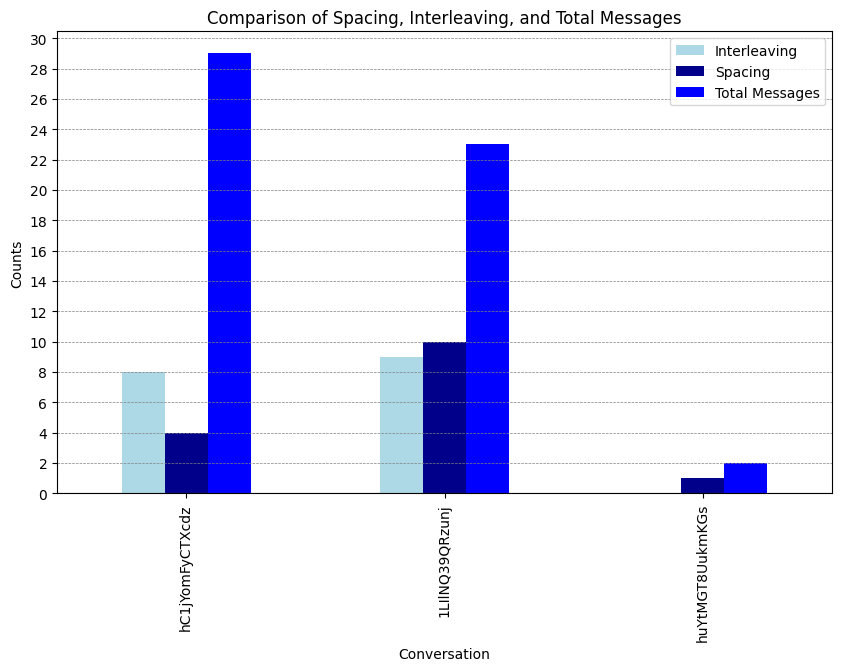

The number of conversations is: 3
The total number of messages is: 54
The total number of interleave messages is: 17
The total number of spacing messages is: 15
The percentage of interleave messages is: 31.48%


In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

# Load the merged CSV file into a DataFrame
df = pd.read_csv('data/merged_result.csv', sep=';')

# Convert 'Datetime' column to datetime using the correct format
df['Datetime'] = pd.to_datetime(df['Datetime'], format='%H:%M:%S - %d/%m/%Y', errors='coerce')

# Filter the DataFrame to only include rows where 'Role' column is 'User'
df = df[df['Role'] == 'User']

# Calculate time differences between each message for each user
df['TimeDelta'] = df.groupby('Id')['Datetime'].diff().fillna(pd.Timedelta(seconds=0))
df['TimeDeltaMinutes'] = df['TimeDelta'].dt.total_seconds() / 60  # Convert to minutes

# Remove rows where the 'Change' column is missing
df = df.dropna(subset=['Change'])

# Remove unnecessary columns from the DataFrame: Message, AI - 1%, AI - 2%, AI - 3%, AI - 4%, AI - 11%
df = df.drop(columns=['Message', 'AI - 1%', 'AI - 2%', 'AI - 3%', 'AI - 4%', 'AI - 11%'])

# Keep only conversations where there is at least one record with TimeDeltaMinutes > 60
ids_to_keep = df[df['TimeDeltaMinutes'] > 60]['Id'].unique()
df = df[df['Id'].isin(ids_to_keep)]

# save the DataFrame to a new CSV file
#df.to_csv('data/interleaving_spacing.csv', index=False, sep=';')

# Count the number of 'Yes' in the 'Change' column for each unique 'Id'
yes_counts = df[df['Change'] == 'Yes'].groupby('Id').size()

# Count the number of messages with TimeDeltaMinutes > 60 for each unique 'Id'
spacing_counts = df[df['TimeDeltaMinutes'] > 60].groupby('Id').size()

# Count the total number of messages for each unique 'Id'
total_messages_counts = df.groupby('Id').size()

# Combine the counts into a single DataFrame
comparison_df = pd.DataFrame({
    'Yes Counts': yes_counts,
    'Spacing Counts': spacing_counts,
    'Total Messages': total_messages_counts
}).fillna(0)

# Sort the DataFrame by 'Total Messages' in descending order
comparison_df = comparison_df.sort_values(by='Total Messages', ascending=False)
# Plot the results with combined bars in shades of blue
ax = comparison_df.plot(kind='bar', figsize=(10, 6), color=['lightblue', 'darkblue', 'blue'])
plt.xlabel('Conversation')
plt.ylabel('Counts')
plt.title('Comparison of Spacing, Interleaving, and Total Messages')
plt.legend(['Interleaving', 'Spacing', 'Total Messages'], loc='upper right')
ax.yaxis.set_major_locator(plt.MultipleLocator(2))  # Ensure Y-axis has even integer ticks starting from 0
ax.set_ylim(bottom=0)  # Ensure Y-axis starts from 0
ax.axhline(y=0, color='gray', linewidth=0.8)  # Add a horizontal gray line at y=0

# Add dashed gray lines at each y-tick
for tick in ax.get_yticks():
    ax.axhline(y=tick, color='gray', linestyle='--', linewidth=0.5)

plt.show()

# Count the number of unique users
unique_users = df['Id'].nunique()
print(f'The number of conversations is: {unique_users}')

# Count number of messages
total_messages = df.shape[0]
print(f'The total number of messages is: {total_messages}')

# Count the total of interleave messages
total_interleave = df[df['Change'] == 'Yes'].shape[0]
print(f'The total number of interleave messages is: {total_interleave}')

# Count the total of spacing messages
total_spacing = df[df['TimeDeltaMinutes'] > 60].shape[0]
print(f'The total number of spacing messages is: {total_spacing}')

# % of interleave messages
percentage_interleave = (total_interleave / total_messages) * 100
print(f'The percentage of interleave messages is: {percentage_interleave:.2f}%')



## Topics

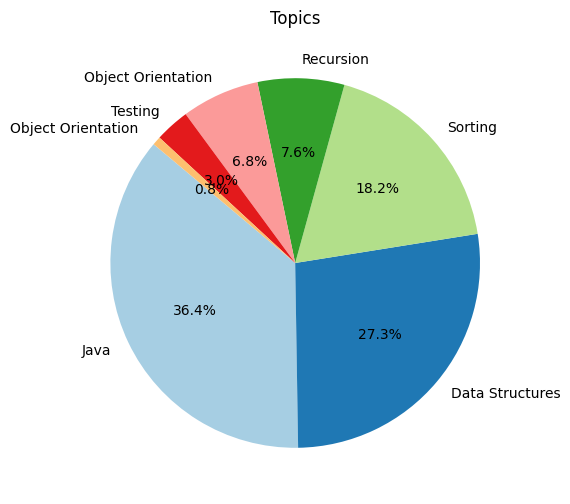

In [157]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the merged CSV file into a DataFrame
df = pd.read_csv('data/merged_result.csv', sep=';')

# Count the occurrences of each topic
topic_counts = df['Topic'].value_counts()

# Plot the pie chart with a single color palette
plt.figure(figsize=(10, 6))
colors = plt.cm.Paired(range(len(topic_counts)))  # Use the 'Paired' colormap
topic_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=colors)
plt.ylabel('')  # Hide the y-label
plt.title('Topics')
plt.show()
